# Probability matching and Kelly Betting


Hypotheses: probability matching maximises the long term growth of the population, in the same way that Kelly betting does.

Maybe there is a link with parameter uncertainty as well?


https://alo.mit.edu/wp-content/uploads/2021/08/journal.pone_.0252540.pdf

In [21]:
import datetime as dt
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# pd.options.plotting.backend = "plotly"
# pio.templates.default = "plotly_dark"
# pio.renderers.default = "notebook_connected"
plt.style.use("seaborn-deep")
plt.rcParams["figure.dpi"] = 150


In [22]:
def kelly(p, w=1, l=1):
    return p / l - (1 - p) / w


kelly(0.7)


0.3999999999999999

## Probability matching is suboptimal

Below we examine the case of an individual playing a game with the following rules:

- *n* iterations
- each iteration is a flip of a biased coin with $p = 0.8$
- in each iteration, an individual bets $1 on either H or T. They lose their bet if they are wrong, win their bet if they are right.

Obviously the dominant strategy is to bet \$1 on H every time if $p > 0.5$, else bet \$1 on T every time. 

"Probability matching" is the observed bias in which people tend to bet H with a frequency approx equal to the probability of H, i.e betting heads 80% of the time.

Consider a situation where the coin has known bias $p \geq 0.5$ and we bet heads with frequency $f$. Elementary arithmetic shows that the EV per iteration is $1 - 2(f+p-2fp)$. 

In the "optimal" case $f=1$, we recover $EV = 2p-1$. Probability matching yields $(2p-1)^2$. 



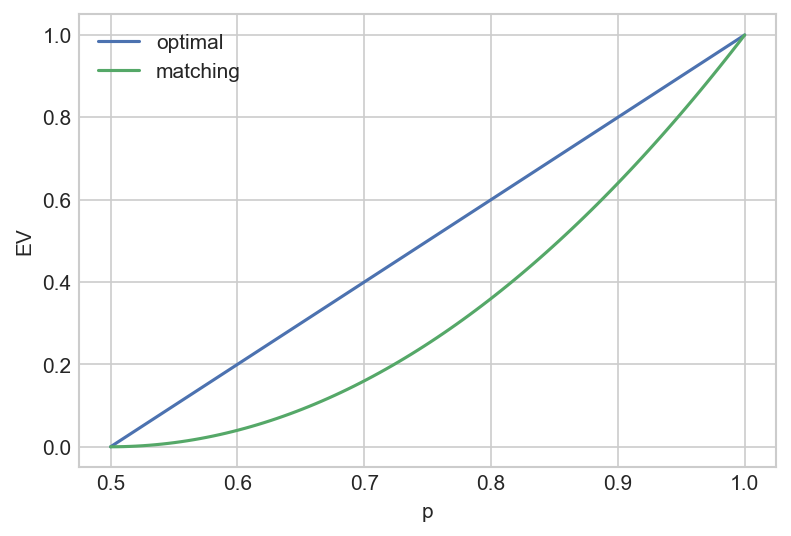

In [24]:
# Analytical
ps = np.linspace(0.5, 1, 100)
df = pd.DataFrame({"optimal": 2 * ps - 1, "matching": (2 * ps - 1) ** 2}, index=ps)
df.plot(xlabel="p", ylabel="EV")


## Simulation

For a given true probability, we can see that the EV is linear in f. e.g if $p=0.8$, we have $EV = 1.2f - 0.6$. 

This is verified by simulation

In [25]:
def flips(p=0.5, n=10000):
    # Codes H/T as +/-1
    a = np.random.binomial(1, p, (n,))
    return np.where(a == 0, -1, a)


In [26]:
true_prob = 0.8
s_prob = 1

y = flips(true_prob)
s = flips(s_prob)


In [27]:
def eval_strat(s_prob, true_prob=0.8, n=10000):
    y = flips(true_prob, n)
    s = flips(s_prob, n)
    return (y * s).cumsum()


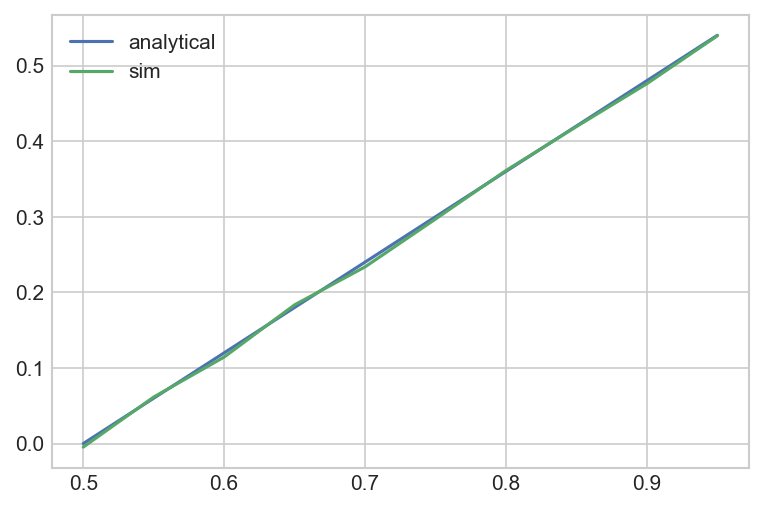

In [29]:
n = 100_000
ps = np.arange(0.5, 1.0, 0.05)
res = []
for s_prob in ps:
    res.append(eval_strat(s_prob, 0.8, n)[-1] / n)

pd.DataFrame({"analytical": 1.2 * ps - 0.6, "sim": res}, index=ps).plot()


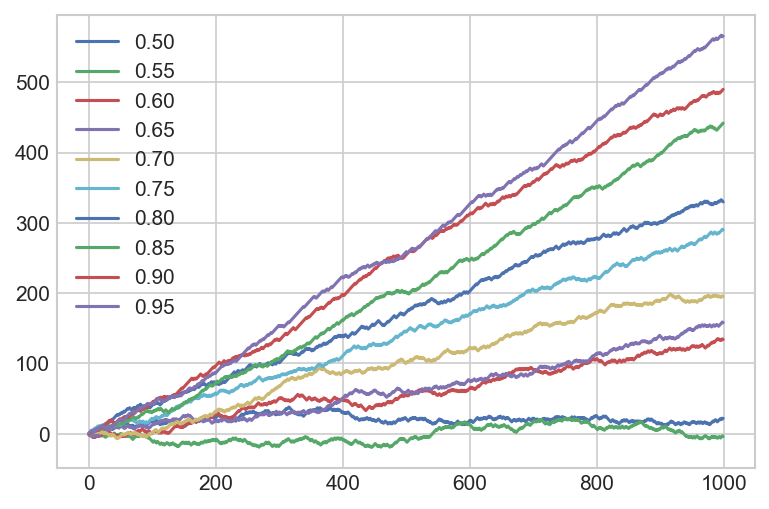

In [30]:
# Plotting wealth growth
ps = np.arange(0.5, 1.0, 0.05)
res = {}
for s_prob in ps:
    res[f"{s_prob:.2f}"] = eval_strat(s_prob, 0.8, 1000)

pd.DataFrame(res).plot()


## Kelly fraction and probability matchihg



In [32]:
def kelly_frac(p, W):
    return p - (1 - p) / W


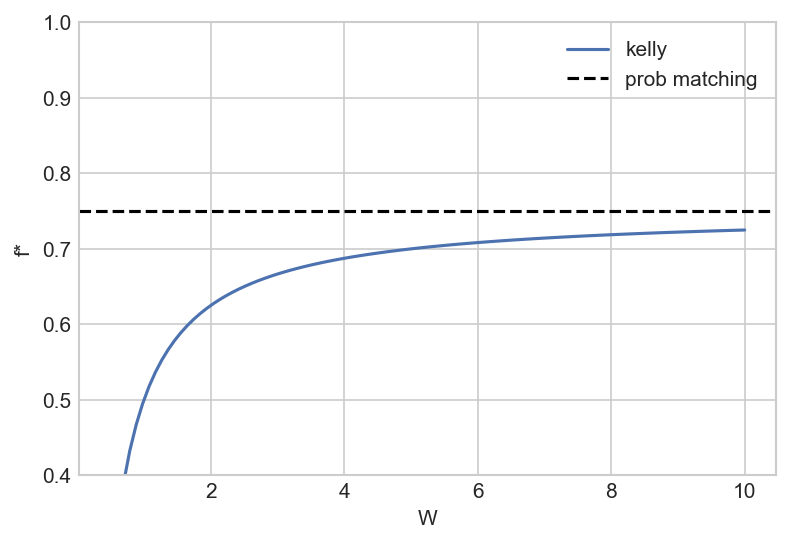

In [47]:
Ws = np.linspace(0.5, 10, 100)

fs = kelly_frac(0.75, Ws)

fig, ax = plt.subplots()
ax.plot(Ws, fs, label="kelly")
ax.set_ylim(0.4, 1)
ax.axhline(0.75, xmin=0, xmax=9, color="k", linestyle="--", label="prob matching")
ax.set_xlabel("W")
ax.set_ylabel("f*")
ax.legend()
plt.show();


In [49]:
kelly_frac(0.75, 5)

0.7

In [ ]:
def kelly_sim(true_prob=0.8, n=100_000):
    y = flips(true_prob, n)


In [144]:
y = flips(true_prob, n)
y


array([1, 1, 1, ..., 1, 1, 1])